In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Definir las constantes
g = 9.8 # gravedad [m/s^2]
p_atm = 101325 # Presión atmosférica [Pa]
beta = 3.67e-3 # Coeficiente de expansion termica [1/K]
T_w = 80.0 + 273.0 # Temperatura de la pared [K]
T_a = 20.0 + 273.0 # Temperatura ambiente [K]
delta_T = T_w - T_a
lambda_f = 0.04 # Coeficiente de friccion [adimensional]
R = 10.0 # Radio de la tuberia [m]
L = 100.0 # Longitud de la tuberia [m]
alpha = 2.2e-5 # Coeficiente de difusividad [m^2/s]
rho_0 = 1.0 # Densidad [kg/m^3]
Cp = 1.012 # Capacidad calorifica [J/(kg K)]
u_c = np.sqrt(g * beta * L * delta_T) # Velocidad caracteristica [m/s]
k = 0.024 # Conductividad termica [W/(m K)]
nu = 1.71e-5 # Viscosidad [Pa s]
Ra_D = (g * beta * delta_T * (2 * R)**3)/ nu**2 # Numero de Rayleigh
Nu = (576/(Ra_D * 2 * R /L)**2 + 2.873/(Ra_D * 2 * R /L)**(1/2))**(-1/2)# Numero de Nusselt
h_v = (k * Nu)/ (2 * R * L)
Pi_0 = (rho_0 * g * L) / (p_atm) 
Pi_d = (rho_0 * u_c**2) / (2 * p_atm)
LAMBDA = (lambda_f * L) / (8 * R)
gamma = (h_v * L) / (rho_0 * Cp * u_c)
delta = alpha / (L * u_c)
t_c = L/ u_c # tiempo caracteristico [s] primera definición
R_gas = 8.314 
m = 29 

/var/folders/lx/vhxvbgp94fj63r8wrldf_13m0000gn/T/ipykernel_1663/3437594926.py:34: RuntimeWarning: overflow encountered in scalar multiply
  - v[i+1, j] * (theta[i, j+1] - theta[i, j])/ deta
/var/folders/lx/vhxvbgp94fj63r8wrldf_13m0000gn/T/ipykernel_1663/3437594926.py:21: RuntimeWarning: invalid value encountered in scalar subtract
  - (1/(2 * Pi_d)) * (Pi[i, j+1] - Pi[i, j]) / deta
/var/folders/lx/vhxvbgp94fj63r8wrldf_13m0000gn/T/ipykernel_1663/3437594926.py:23: RuntimeWarning: overflow encountered in scalar power
  - LAMBDA * v[i, j]** 2
/var/folders/lx/vhxvbgp94fj63r8wrldf_13m0000gn/T/ipykernel_1663/3437594926.py:34: RuntimeWarning: invalid value encountered in scalar subtract
  - v[i+1, j] * (theta[i, j+1] - theta[i, j])/ deta
/var/folders/lx/vhxvbgp94fj63r8wrldf_13m0000gn/T/ipykernel_1663/3437594926.py:35: RuntimeWarning: invalid value encountered in scalar subtract
  + delta * (theta[i, j+1] - 2 * theta[i, j] + theta[i, j-1]) / deta**2
/var/folders/lx/vhxvbgp94fj63r8wrldf_13m0000g

TypeError: Shapes of x (100, 200) and z (200, 100) do not match

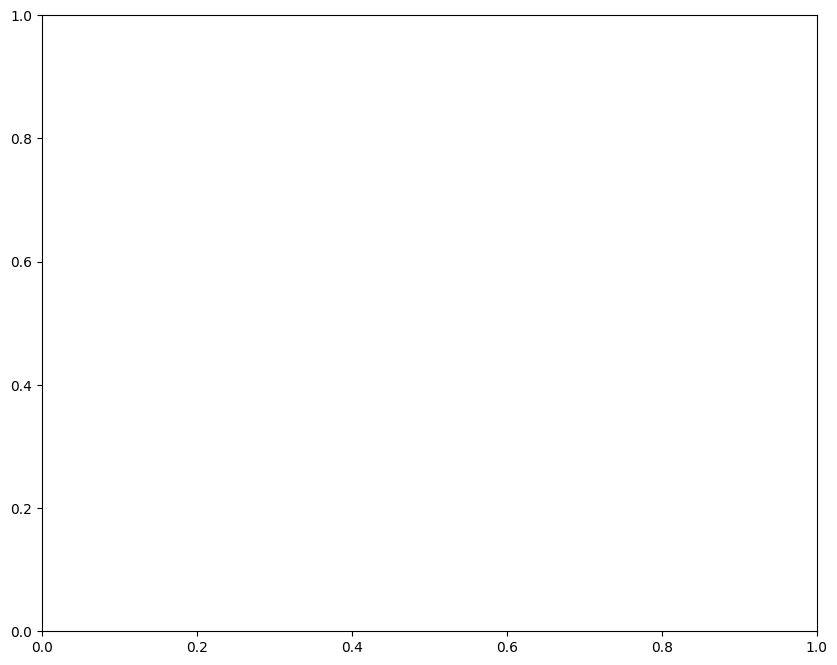

In [27]:
# Definición de variables y condiciones iniciales
N = 200  # Número de puntos en la dirección temporal
M = 100  # Número de puntos en la dirección vertical
eta = np.linspace(0, 1, M)  # Coordenada vertical adimensional
tau = np.linspace(0, 1, N)  # Coordenada temporal adimensional
deta = (eta[-1] - eta[0])/ M
dtau = (tau[-1] - tau[0])/ N
v = np.zeros((N,M))  # Velocidad adimensional
theta = np.zeros((N, M))  # Temperatura adimensional
Pi = np.zeros((N, M))  # Presión adimensional

# Condiciones iniciales
v[0, :] = 0.0  # Velocidad inicial cero
theta[0, :] = 0.0  # Temperatura inicial uniforme
Pi[0, :] = 1.0  # Presión inicial uniforme

for i in range(N-1):
    for j in range(M-1):
        
        v[i+1, j] = v[i,j] + dtau * (
            - (1/(2 * Pi_d)) * (Pi[i, j+1] - Pi[i, j]) / deta
            - theta[i, j]
            - LAMBDA * v[i, j]** 2
        )
        
        if j == 0:
            theta[i+1, j] = theta[i, j] + dtau * (
                - v[i+1, j] * (theta[i, j+1] - theta[i, j])/ deta
                + delta * (theta[i, j+1] - 2 * theta[i, j] + theta[i, j+1]) / deta**2
                - gamma * (theta[i, j] - 1)
                )
        else:
            theta[i+1, j] = theta[i, j] + dtau * (
                - v[i+1, j] * (theta[i, j+1] - theta[i, j])/ deta
                + delta * (theta[i, j+1] - 2 * theta[i, j] + theta[i, j-1]) / deta**2
                - gamma * (theta[i, j] - 1)
                )

        Pi[i+1,j] = ((rho_0 * R_gas)/(m * p_atm)) * (delta_T * theta[i+1,j] - T_a)
            


# Graficar la solucion theta
T, X = np.meshgrid(np.linspace(tau[0], tau[-1], N), np.linspace(eta[0], eta[-1], M))
fig, ax = plt.subplots(figsize=(10,8))
cmap = plt.get_cmap('jet')  # Seleccionar un mapa de color
contour = ax.contourf(T, X, theta, cmap=cmap)
ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$\eta$')
ax.set_title('Solución de '+r'$\theta (\eta,\tau)$')

# Agregar la leyenda
cbar = fig.colorbar(contour, ax=ax)
cbar.set_label('Valores de ' + r'$\theta$')

plt.show()

# Graficar la solucion Pi
T, X = np.meshgrid(np.linspace(tau[0], tau[-1], N), np.linspace(eta[0], eta[-1], M))
fig, ax = plt.subplots(figsize=(10,8))
cmap = plt.get_cmap('jet')  # Seleccionar un mapa de color
contour = ax.contourf(T, X, Pi, cmap=cmap)
ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$\eta$')
ax.set_title('Solución de '+r'$\Pi (\eta,\tau)$')
ax.set_xlim(0.95,1)

# Agregar la leyenda
cbar = fig.colorbar(contour, ax=ax)
cbar.set_label('Valores de ' + r'$\Pi$')

plt.show()

# Graficar la solucion de v(t)
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(tau, v, label = r'$v(\tau)$')

# Agregar una linea horizontal en un valor especifico de x
x_linea = 0.01  # Valor de x donde se dibujará la linea horizontal
ax.axhline(y=0.01, color='r', linestyle='--', label = r'$v_0$')

ax.set_xlabel(r'$\tau$')
ax.set_ylabel(r'$v(\tau)$')
ax.set_title('Solución de '+r'$v(\tau)$')
#ax.legend()
plt.show()
